In [2]:
import os
os.chdir('D:/Sveta/BooksOCR/PaddleOCR/')


In [33]:
!dir

 Volume in drive D is HDD
 Volume Serial Number is 4224-0798

 Directory of D:\Sveta\BooksOCR\PaddleOCR

07/21/2023  03:24 PM    <DIR>          .
07/21/2023  04:50 PM    <DIR>          ..
07/21/2023  03:20 PM               353 .clang_format.hook
07/21/2023  03:20 PM    <DIR>          .github
07/21/2023  03:20 PM               469 .gitignore
07/21/2023  03:20 PM             1,017 .pre-commit-config.yaml
07/21/2023  03:20 PM                48 .style.yapf
07/21/2023  03:20 PM    <DIR>          applications
07/21/2023  03:20 PM    <DIR>          benchmark
07/21/2023  03:20 PM    <DIR>          configs
07/21/2023  03:20 PM    <DIR>          deploy
07/21/2023  03:20 PM    <DIR>          doc
07/21/2023  03:20 PM            11,438 LICENSE
07/21/2023  03:20 PM               294 MANIFEST.in
07/21/2023  03:31 PM    <DIR>          model
07/21/2023  03:20 PM            31,653 paddleocr.py
07/21/2023  03:20 PM    <DIR>          ppocr
07/21/2023  03:20 PM    <DIR>          PPOCRLabel
07/21/2023  03:2

In [35]:
!pip install -r requirements.txt

     ---------------------------------------- 1.4/1.4 MB 14.4 MB/s eta 0:00:00
     --------------------------------------- 22.8/22.8 MB 20.4 MB/s eta 0:00:00
     ------------------------------------- 948.0/948.0 kB 20.4 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB ? eta 0:00:00
     -------------------------------------- 100.1/100.1 kB 5.6 MB/s eta 0:00:00
     --------------------------------------- 15.0/15.0 MB 23.3 MB/s eta 0:00:00
     ---------------------------------------- 6.3/6.3 MB 22.5 MB/s eta 0:00:00
     ---------------------------------------- 1.8/1.8 MB 19.3 MB/s eta 0:00:00
     --------------------------------------- 35.6/35.6 MB 20.4 MB/s eta 0:00:00
     --------------------------------------- 42.5/42.5 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 11.7 MB/s eta 0:00:00
     ------------------------------------- 250.0/250.0 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparin

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [10 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\lanms
  copying lanms\__init__.py -> build\lib.win-amd64-cpython-310\lanms
  running build_ext
  building 'lanms._C' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lanms-neo
  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [14 lines of output]
  NumPy extension not found - disabling support for it!
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creati

In [3]:
!python3 D:\Sveta\BooksOCR\PaddleOCR\tools\infer_det.py

Traceback (most recent call last):
  File "D:\Sveta\BooksOCR\PaddleOCR\tools\infer_det.py", line 32, in <module>
    import paddle
ModuleNotFoundError: No module named 'paddle'


1. Download data without !wget

In [24]:
from pathlib import Path
import requests


def download_mnist(path):
    url = "https://github.com/pytorch/tutorials/raw/main/_static/"
    filename = "mnist.pkl.gz"
    content = requests.get(url).content # Returns the content of the response, in bytes
    
    if not path.exists():
        content = requests.get(url + filename).content
        (path / filename).open("wb").write(content)

    return path / filename

In [25]:
data_path = Path("data") if Path("data").exists() else Path("../data")
path = data_path / "downloaded" / "vector-mnist"
path.mkdir(parents=True, exist_ok=True)

datafile = download_mnist(path)

In [5]:
datafile = "../data/downloaded/vector-mnist/mnist.pkl.gz"

In [6]:
datafile

'../data/downloaded/vector-mnist/mnist.pkl.gz'

In [15]:
requests.get??

Signature: requests.get(url, params=None, **kwargs)
Source:   
def get(url, params=None, **kwargs):
    r"""Sends a GET request.

    :param url: URL for the new :class:`Request` object.
    :param params: (optional) Dictionary, list of tuples or bytes to send
        in the query string for the :class:`Request`.
    :param \*\*kwargs: Optional arguments that ``request`` takes.
    :return: :class:`Response <Response>` object
    :rtype: requests.Response
    """

    return request("get", url, params=params, **kwargs)
File:      c:\users\oleg\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages\requests\api.py
Type:      function

In [7]:
import gzip
import pickle
import torch

def read_mnist(path):
    with gzip.open(path, "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
    return x_train, y_train, x_valid, y_valid

x_train, y_train, x_valid, y_valid = read_mnist(datafile) 
# x_train.shape (50000, 784)
# y_train.shape (50000,)
# x_valid.shape (10000, 784)
# img.size (28,28)

# Convert to torch tensors
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [8]:
x_train.shape

torch.Size([50000, 784])

In [9]:
from torch.utils.data import Dataset,TensorDataset, DataLoader,  SubsetRandomSampler
from torchvision import transforms

#transform_list =  [transforms.Grayscale(1),
#                    transforms.Resize((28, 28))]
#                    #transforms.ToTensor()]
                    #transforms.Normalize((0.5,), (0.5,))]
#transform2 = transforms.Compose(transform_list)

train_set = TensorDataset(x_train, y_train)
val_set = TensorDataset(x_valid, y_valid)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=0)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=16, shuffle=False, num_workers=0)



0 torch.Size([784]) tensor(5)


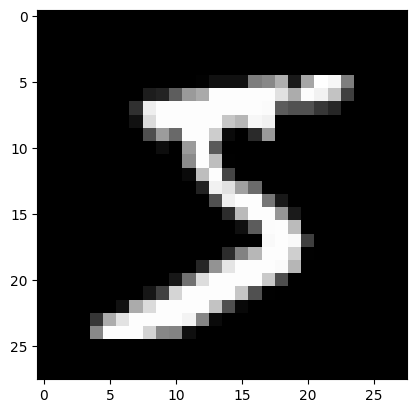

In [10]:
from torchvision.transforms.functional import to_pil_image
from matplotlib import pyplot as plt

for i, (x,y) in enumerate(train_set):
    print(i, x.shape, y)
    x = x.view(1,28,28)
    img_pil = to_pil_image(x)
    plt.imshow(img_pil, 'gray')
    plt.show()
    break

Define the model



In [21]:
import torch.nn as nn
import torch.optim as optim
import time
# import torch.nn.functional as F F.relu() for forward() 

#multi-layer perceptron (MLP) 
# MLPs cannot handle two or three-dimensional data
class MNISTLogistic(nn.Module):
    def __init__(self, N, N1, N2):
        super().__init__()
        self.fc1 = nn.Linear(784, N)  # pytorch finds the nn.Parameters inside this nn.Module
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(N, N1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(N1, N2)  # pytorch finds the nn.Parameters inside this nn.Module
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(N2, 10)
        self.softmax = nn.Softmax(dim=1)
        

    def forward(self, xb):
        out = self.fc1(xb)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        out = self.softmax(out)
        return out 

In [17]:
def accuracy(out: torch.Tensor, yb: torch.Tensor) -> torch.Tensor:
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

def compute_val_accuracy(model, val_loader):
    total_samples = 0
    val_acc = 0
    for i, batch in enumerate(val_loader):
        x, y = batch
        total_samples += y.shape[0]
        x = x.to(device)
        y = y.to(device)
        
        pred = model(x)
        val_acc += accuracy(pred, y)
    return (val_acc/total_samples)

def train(model, dataloader, loss_fn, opt, num_epoch, report_accuracy=True):
    loss_history = []
    train_history = []
    val_history = []
    
    for epoch in range(num_epoch):
        model.train()

        train_acc = 0
        train_loss_accum = 0
        total_samples = 0
        
        for i, batch in enumerate(dataloader):
            x, y = batch
            total_samples += y.shape[0]
            x = x.to(device)
            y = y.to(device)

            opt.zero_grad()

            pred = model(x)
            loss_value = loss_fn(pred, y)
            train_loss_accum += loss_value.item()

            loss_value.backward()
            opt.step()
            
            if report_accuracy:
                train_acc += accuracy(pred, y)

        
        model.eval()
        with torch.no_grad():
            val_accuracy = compute_val_accuracy(model, val_loader)

        ave_loss = train_loss_accum / i
        train_accuracy = float(train_acc) / total_samples
        
        loss_history.append(float(ave_loss))  
        train_history.append(float(train_accuracy))
        val_history.append(float(val_accuracy))
            
            
        print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (ave_loss, train_accuracy, val_accuracy))
        

The first layer has 784 neurons connected to 256 neurons, so 784*256 weighted connections plus 256 bias terms.

The second layer has 650 neurons connected to2800 neurons, 6502800 weighted connections plus2800 bias terms.

The third layer h28 100 neurons connected to 10 neuron28 100*10 weighted connections plus 10 bias terms.

684⋅650+650285028002800+100⋅242,76222,360

In [26]:
# https://colab.research.google.com/github/bentrevett/pytorch-image-classification/blob/master/1_mlp.ipynb#scrollTo=gik6Q5ZB4O9q

device = 'cpu' #'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

N = 256
N1 = 128
N2 = 64
model = MNISTLogistic(N, N1, N2)

for param in model.parameters():
    print(type(param.data), param.size())

count_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad) #to calculate the number of trainable parameters (weights and biases) in our model
print(f'The model has {count_parameters:,} trainable parameters')

model = model.to(device)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()


cpu
<class 'torch.Tensor'> torch.Size([256, 784])
<class 'torch.Tensor'> torch.Size([256])
<class 'torch.Tensor'> torch.Size([128, 256])
<class 'torch.Tensor'> torch.Size([128])
<class 'torch.Tensor'> torch.Size([64, 128])
<class 'torch.Tensor'> torch.Size([64])
<class 'torch.Tensor'> torch.Size([10, 64])
<class 'torch.Tensor'> torch.Size([10])
The model has 242,762 trainable parameters


In [23]:
model.__init__??

Signature: model.__init__(N, N1, N2)
Docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
Source:   
    def __init__(self, N, N1, N2):
        super().__init__()
        self.fc1 = nn.Linear(784, N)  # pytorch finds the nn.Parameters inside this nn.Module
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(N, N1)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(N1, N2)  # pytorch finds the nn.Parameters inside this nn.Module
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(N2, 10)
        self.softmax = nn.Softmax(dim=1)
File:      c:\users\oleg\appdata\local\temp\ipykernel_3728\450453637.py
Type:      method

In [24]:
%%time

train(model, train_loader, loss_fn, optimizer, num_epoch=5)

Average loss: 1.610645, Train accuracy: 0.054247, Val accuracy: 0.057794
Average loss: 1.531012, Train accuracy: 0.058344, Val accuracy: 0.058994
Average loss: 1.514243, Train accuracy: 0.059371, Val accuracy: 0.059306
Average loss: 1.504816, Train accuracy: 0.059896, Val accuracy: 0.060019
Average loss: 1.498997, Train accuracy: 0.060253, Val accuracy: 0.060231
CPU times: total: 3min 20s
Wall time: 50 s


In [38]:
def calculate_accuracy1(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy1(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)
    
def train1(model, iterator, optimizer, criterion, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy1(y_pred, y)

        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
num_epoch = 5
for epoch in range(num_epoch):
    train_loss, train_acc = train1(model, train_loader, optimizer, loss_fn, device)
    valid_loss, valid_acc = evaluate(model, val_loader, loss_fn, device)

    print("Average loss: %f, Train accuracy: %f, Val accuracy: %f" % (train_loss, train_acc, valid_acc))

Average loss: 1.510365, Train accuracy: 0.950640, Val accuracy: 0.933900
Average loss: 1.507473, Train accuracy: 0.953640, Val accuracy: 0.955800
